In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [ ]:
df = fetch_california_housing(as_frame=True).frame

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.

In [ ]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Population']])

population_std = pd.DataFrame(scaler.transform(df[['Population']]))
df.loc[:, 'Population'] = population_std

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,-0.974429,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.861439,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,-0.820777,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,-0.766028,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,-0.759847,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,-0.512592,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,-0.944405,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,-0.369537,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,-0.604429,2.123209,39.43,-121.32,0.847


Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
X = df.copy()
y = X['MedHouseVal']
del X['MedHouseVal']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите модель регрессии на обучающем множестве.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)
predictions[0:5]

array([0.71912284, 1.76401657, 2.70965883, 2.83892593, 2.60465725])

Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [ ]:
model.score(X_test, y_test)

0.5757877060324512

Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_regressor_model = DecisionTreeRegressor(random_state=20)
tree_regressor_model.fit(X_train, y_train)
tree_regressor_model.predict(X_test)[0:5]

array([0.417  , 1.203  , 5.00001, 2.17   , 2.257  ])

In [ ]:
tree_regressor_model.score(X_test, y_test)

0.6184712196862219

Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.

In [ ]:
list_depth = [i+1 for i in range(5,20)]
min_samples_leafs = [i+1 for i in range(10)]

dt_models = {}
for i in list_depth:
  for j in min_samples_leafs:
    dt_models[f'depth={i} leafs={j}'] = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j, random_state=20).fit(X_train, y_train)

In [ ]:
results = []
for v in dt_models.values():
  results.append((v, v.score(X_test, y_test)))

In [ ]:
# 5 самых результативных моделей
best_results = sorted(results, key=lambda x: x[1], reverse=True)[0:5]
best_results

[(DecisionTreeRegressor(max_depth=12, min_samples_leaf=9, random_state=20),
  0.723863507416261),
 (DecisionTreeRegressor(max_depth=17, min_samples_leaf=10, random_state=20),
  0.7233828407039483),
 (DecisionTreeRegressor(max_depth=11, min_samples_leaf=9, random_state=20),
  0.7231722038787816),
 (DecisionTreeRegressor(max_depth=15, min_samples_leaf=9, random_state=20),
  0.7230062358273519),
 (DecisionTreeRegressor(max_depth=18, min_samples_leaf=10, random_state=20),
  0.7229502258916338)]

In [ ]:
# самая результативная модель
dt_best_model = best_results[0][0]
dt_best_model

DecisionTreeRegressor(max_depth=12, min_samples_leaf=9, random_state=20)

Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным.

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

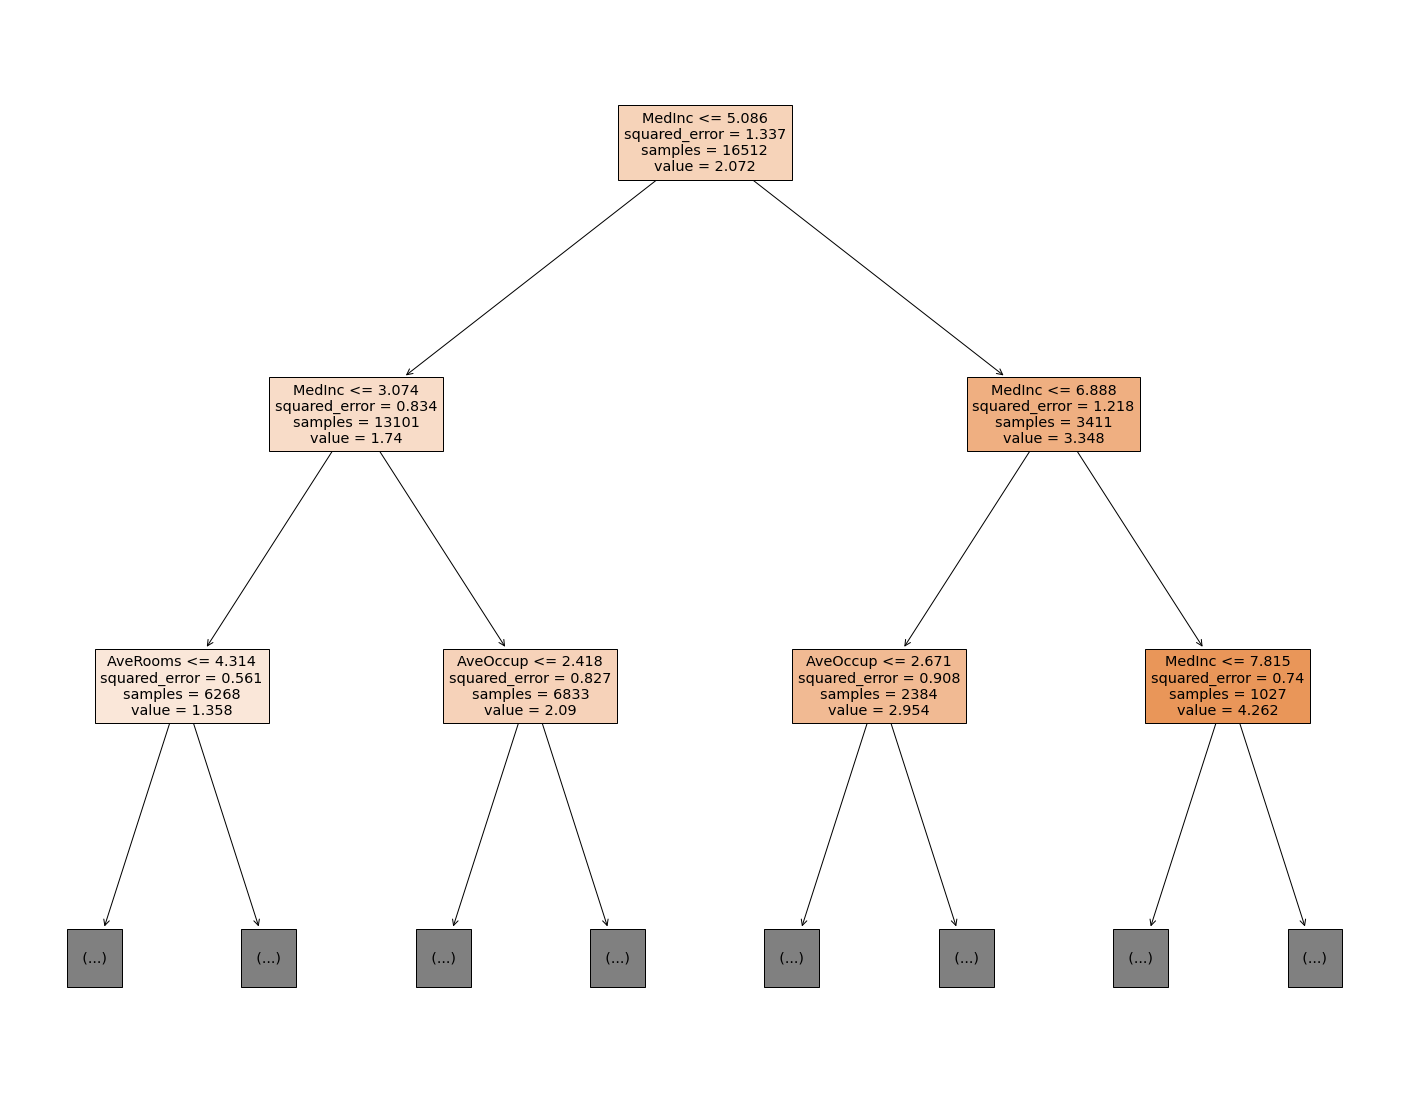

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_best_model, filled=True, max_depth=2, feature_names = X.columns)

Оценка важности признаков

In [ ]:
dt_best_model.feature_importances_

array([0.60462117, 0.04685413, 0.03946795, 0.01281553, 0.00960843,
       0.13183642, 0.08485868, 0.0699377 ])

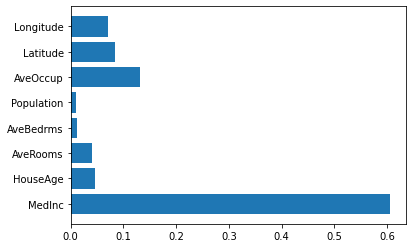

In [ ]:
plt.barh(np.arange(len(dt_best_model.feature_importances_)), dt_best_model.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

Выводы:

1) Точность модели на дереве решений получилась больше чем на линейной регрессии на 0,15 (r2).

2) Обученные в работе модели деревьев решений предпочтительнее использовать на ненормализованных данных, так как по сравнению с моделями линейной регресии в случае ненормализованных данных получаются лучшие метрики.

